In [101]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns

from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
import re
import json
from pathlib import Path


from open_spiel.python.algorithms.exploitability import nash_conv, best_response
from open_spiel.python.examples.ubc_plotting_utils import *


import bokeh
from bokeh.layouts import row, column
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ColorBar, LogColorMapper, LinearColorMapper
from bokeh.transform import linear_cmap, log_cmap
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# experiment = Experiment.objects.get(name='april11_flattest_large_2')
experiment = Experiment.objects.get(name='albert_games2')
experiment

<Experiment: albert_games2>

In [103]:
master_df = get_all_frames(experiment)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.33it/s]


In [ ]:
!ls /shared/outputs

In [105]:
plot_all_models(master_df, notebook=False, final_compare=True)

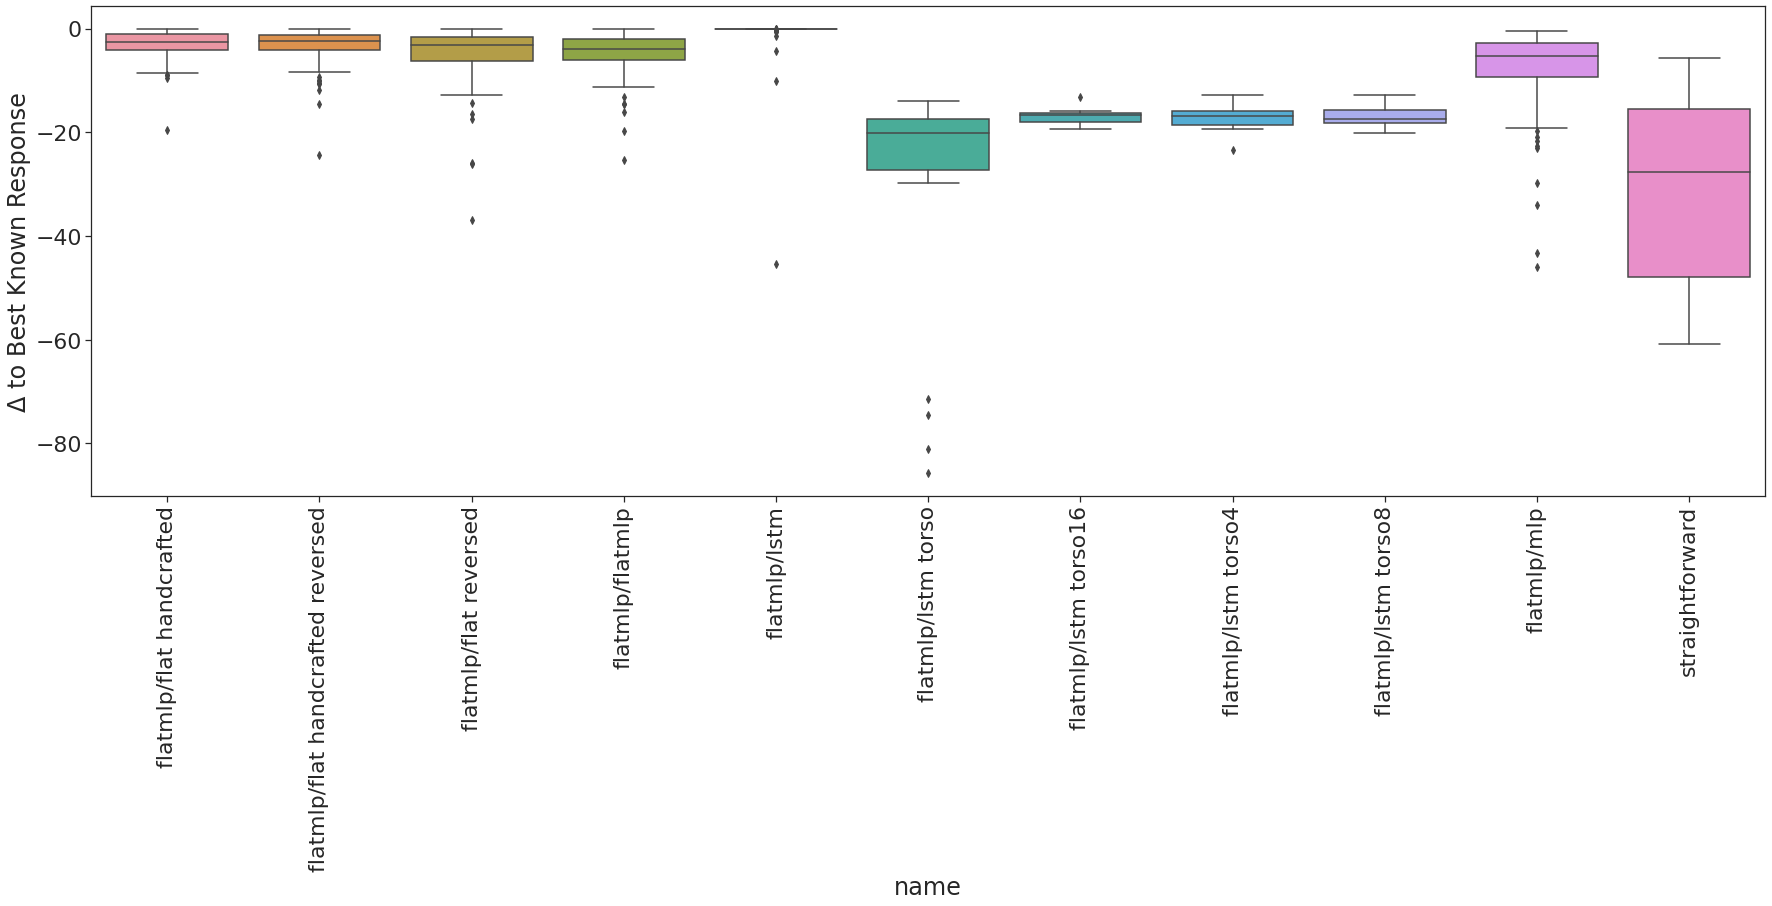

In [94]:
# s = ['_mlp', '_mlp_1', '_mlp_2', '_lstm', '_lstm_1', '_lstm_2', 'Straightforward']
# good_configs = ['straightforward', 'mar17/lstm', 'mar17/mlp-Copy6']
# fig = compare_best_responses(master_df.query('name in @good_configs'))
fig = compare_best_responses(master_df)
special_save_fig(fig, "configs.png", fmt=None, dpi=300, tight=True)

In [100]:
master_df.query('t == 10000000 and model == "large_game_2-flatmlpflat_handcrafted_reversed-100" and player == 1')

,t,name,reward,br_player,player,Baseline,Regret,PositiveRegret,MaxPositiveRegret,ApproxNashConv,num_players,model
167,10000000,None,148.341245,None,1,148.341245,0.000000,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
163,10000000,flatmlp/lstm,157.166963,1,1,148.341245,8.825718,8.825718,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
165,10000000,flatmlp/flatmlp,150.334303,1,1,148.341245,1.993058,1.993058,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
164,10000000,flatmlp/flat_handcrafted,149.433152,1,1,148.341245,1.091907,1.091907,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
162,10000000,flatmlp/flat_handcrafted_reversed,146.679189,1,1,148.341245,-1.662056,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
161,10000000,flatmlp/mlp,147.382555,1,1,148.341245,-0.958690,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
160,10000000,straightforward,96.536264,1,1,148.341245,-51.804981,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
166,10000000,flatmlp/flat_reversed,150.873983,1,1,148.341245,2.532738,2.532738,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100


In [38]:
master_df

,t,name,reward,br_player,player,Baseline,Regret,PositiveRegret,MaxPositiveRegret,ApproxNashConv,num_players,model
0,1,flatmlp/mlp,141.090951,0,0,83.476609,57.614342,57.614342,60.009213,142.241225,2,large_game_2-flatmlpflat_handcrafted-100
15,1,None,106.067342,None,1,106.067342,0.000000,0.000000,82.232012,142.241225,2,large_game_2-flatmlpflat_handcrafted-100
14,1,flatmlp/lstm,188.299354,1,1,106.067342,82.232012,82.232012,82.232012,142.241225,2,large_game_2-flatmlpflat_handcrafted-100
13,1,flatmlp/flat_handcrafted_reversed,186.371390,1,1,106.067342,80.304048,80.304048,82.232012,142.241225,2,large_game_2-flatmlpflat_handcrafted-100
12,1,flatmlp/flat_reversed,186.756774,1,1,106.067342,80.689431,80.689431,82.232012,142.241225,2,large_game_2-flatmlpflat_handcrafted-100
...,...,...,...,...,...,...,...,...,...,...,...,...
161,10000000,flatmlp/mlp,147.382555,1,1,148.341245,-0.958690,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
160,10000000,straightforward,96.536264,1,1,148.341245,-51.804981,0.000000,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
174,10000000,flatmlp/lstm,117.355024,0,0,101.406412,15.948612,15.948612,15.948612,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100
166,10000000,flatmlp/flat_reversed,150.873983,1,1,148.341245,2.532738,2.532738,8.825718,24.774331,2,large_game_2-flatmlpflat_handcrafted_reversed-100


In [11]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 5))
# plt.imshow(list(q_network.output_layer.parameters())[0].data)
# plt.colorbar()

In [12]:
master_df[['name', 'PositiveRegret']]

,name,PositiveRegret
0,straightforward,54.736458
1,flatmlp/flatmlp-Copy2,59.997244
2,flatmlp/flatmlp,59.977064
3,flatmlp/lstm,60.390681
4,None,0.000000
...,...,...
5,straightforward,73.583422
6,flatmlp/flatmlp,80.792945
7,flatmlp/flatmlp-Copy2,79.883822
8,flatmlp/lstm,81.440309


In [13]:
x = master_df['name'].unique().tolist()
x.remove(None)
x.remove("straightforward")
x

['flatmlp/flatmlp-Copy2',
 'flatmlp/flatmlp',
 'flatmlp/lstm',
 'flatmlp/mlp',
 'flatmlp/flatmlp-Copy3',
 'flatmlp/flatmlp-Copy1']

In [ ]:
for config in x:
    portfolio = [config, 'straightforward']
    p = master_df.query('name in @portfolio and player == br_player').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

In [ ]:
y = list(x)
y.remove('mar17/lstm')
for config in y:
    portfolio = [config, 'mar17/lstm', 'straightforward']
    p = master_df.query('name in @portfolio and player == br_player').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

In [ ]:
z = list(y)
z.remove('_mlp_deep_wide')
for config in z:
    portfolio = [config, '_mlp_deep_wide', '_mlp_wide', 'Straightforward']
    p = master_df.query('config in @portfolio and player == best_responder').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

In [ ]:
dir(bokeh.plotting)

In [ ]:
EquilibriumSolverRun.objects.last().pk

In [91]:
for run in experiment.equilibriumsolverrun_set.all():
    print(run, run.walltime())

large_game_2-flatmlplstm_torso16-100 (april11_flattest_large_2) 16756.483570337296
large_game_2-flatmlplstm_torso4-100 (april11_flattest_large_2) 17795.889971256256
large_game_2-flatmlplstm_torso8-100 (april11_flattest_large_2) 17217.77761697769
large_game_2-flatmlpflat_handcrafted-100 (april11_flattest_large_2) 72203.2245900631
large_game_2-flatmlpflat_reversed-100 (april11_flattest_large_2) 84379.65066838264
large_game_2-flatmlpflatmlp-100 (april11_flattest_large_2) 76319.82596039772
large_game_2-flatmlpmlp-100 (april11_flattest_large_2) 64765.43781375885
large_game_2-flatmlplstm_torso-100 (april11_flattest_large_2) 55321.74237680435
large_game_2-flatmlplstm-100 (april11_flattest_large_2) 121496.56349015236
large_game_2-flatmlpflat_handcrafted_reversed-100 (april11_flattest_large_2) 74735.35052156448


In [ ]:
121496.56349015236